In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [3]:
import numpy as np
import pandas as pd

from utils.data import read_pickle, load_network
from utils.vis import reorder_cluster_ids, plot_raster, vis_heatmap

from seaborn import heatmap

In [84]:
network_df = load_network()

In [85]:
obs_1ms_df = network_df.apply(lambda x: x.sum(0)) 

In [86]:
n_trials_1ms_df = network_df.apply(lambda x: x.shape[0])

In [87]:
network_df[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [88]:
n_trials_1ms_df

2171  02  a    41
          b    41
      03  a    41
      05  a    41
      06  b    41
      07  b    41
      10  b    41
2192  05  a    45
      06  b    45
      08  b    45
      11  a    45
      15  c    45
      16  a    45
2193  02  a    45
      04  b    45
      05  b    45
      06  a    45
      10  a    45
      11  a    45
2194  02  a    45
      04  a    45
      05  a    45
      06  a    45
      08  a    45
3177  03  b    45
      10  a    45
      13  a    45
3189  02  a    45
      05  a    45
      06  a    45
      11  a    45
      15  a    45
      16  a    45
dtype: int64

In [89]:
n_ms = 10
obs_all = obs_1ms_df.apply(lambda x: x.reshape(-1, n_ms).sum(1)).values.tolist()

In [90]:
obs_all

[array([2., 2., 5., 0., 4., 4., 3., 0., 3., 1., 3., 5., 2., 5., 2., 3., 1.,
        5., 2., 1., 3., 2., 2., 4., 2., 2., 3., 0., 2., 4., 4., 2., 3., 3.,
        1., 4., 4., 8., 3., 7., 2., 3., 5., 4., 0., 3., 2., 1., 3., 2., 7.,
        4., 6., 0., 2., 5., 3., 3., 8., 5., 5., 3., 4., 1., 1., 1., 2., 1.,
        2., 0., 6., 9., 3., 3., 1., 4., 8., 4., 5., 2., 4., 3., 4., 1., 7.,
        2., 2., 1., 6., 3., 1., 2., 4., 2., 0., 4., 3., 3., 0., 1., 2., 2.,
        4., 3., 0., 2., 2., 2., 1., 1., 2., 3., 4., 6., 4., 4., 3., 1., 3.,
        1., 2., 3., 2., 2., 3., 1., 1., 2., 3., 2., 2., 4., 1., 3., 0., 2.,
        2., 3., 2., 0., 8., 4., 1., 1., 5., 3., 2., 6., 3., 3., 2., 3., 3.,
        3., 4., 2., 4., 5., 2., 5., 2., 1., 3., 1., 4., 3., 4., 2., 2., 0.,
        1., 3., 1., 3., 4., 2., 3., 1., 1., 5., 1., 1., 0., 2., 3., 5., 3.,
        2., 2., 3., 4., 5., 3., 2., 2., 0., 3., 2., 3., 2.]),
 array([2., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 0.

In [91]:
n_trials_all = n_trials_1ms_df.values * n_ms

In [92]:
n_trials_all

array([410, 410, 410, 410, 410, 410, 410, 450, 450, 450, 450, 450, 450,
       450, 450, 450, 450, 450, 450, 450, 450, 450, 450, 450, 450, 450,
       450, 450, 450, 450, 450, 450, 450], dtype=int64)

In [93]:
cue_time = 500 // n_ms

In [4]:
out = read_pickle('../pickle/sim_shift-8.p')
# out = read_pickle('../pickle/sim.p')

In [107]:
out = read_pickle('../pickle/cue.p')

In [108]:
out[0]

[array([0, 1, 2, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0], dtype=int64),
 array([2, 0, 1, 2, 4, 2, 0, 2, 2, 2, 3, 0, 2, 0, 2, 2, 2, 4, 4, 4, 0, 0,
        0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0], dtype=int64),
 array([3, 3, 0, 2, 2, 2, 0, 4, 4, 4, 1, 0, 4, 0, 4, 2, 4, 2, 4, 4, 0, 4,
        0, 0, 0, 0, 4, 4, 0, 0, 5, 2, 5], dtype=int64),
 array([1, 2, 3, 1, 1, 1, 2, 4, 1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 5, 1, 0, 1, 1, 1, 1, 1, 1, 6], dtype=int64),
 array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64),
 array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2], dtype=int64),
 array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 3], dtype=int64),
 array([1, 2, 3, 1, 1, 1, 1, 4, 1, 1, 0, 1, 5, 1, 1, 5, 1, 1, 3, 1, 1, 1,
        1, 6, 1,

In [109]:
cluster_ids, clster_params, n_clusters = reorder_cluster_ids(*out)

In [110]:
len(cluster_ids), len(clster_params), len(n_clusters)

(281, 281, 281)

In [111]:
clster_params

[array([[ 1.18978264, -4.94326085],
        [ 1.31605438, -1.87522499],
        [-0.31143012, -6.60949205],
        [ 1.91818044, -5.85773562]]),
 array([[-0.31143012, -6.60949205],
        [ 1.13879464, -4.87650084],
        [ 1.31605438, -1.87522499],
        [ 0.05943488, -7.41467339],
        [ 1.91818044, -5.85773562]]),
 array([[  1.68771231, -14.53022779],
        [  1.13879464,  -4.87650084],
        [  0.05943488,  -7.41467339],
        [ -0.10685419,  -6.29454111],
        [  1.91818044,  -5.85773562],
        [  0.56009429,  -5.56116257]]),
 array([[  0.34003542,  -5.48136857],
        [ -1.43813471, -12.87981914],
        [ -2.38422157, -14.43568839],
        [  1.15964047,  -7.24370743],
        [  1.04642939,  -4.65384618],
        [ -3.77200067, -12.03079658],
        [  0.4382121 ,  -8.76857677]]),
 array([[ 0.34003542, -5.48136857],
        [ 1.04642939, -4.65384618]]),
 array([[  0.34003542,  -5.48136857],
        [  1.04642939,  -4.65384618],
        [  0.52047865, -

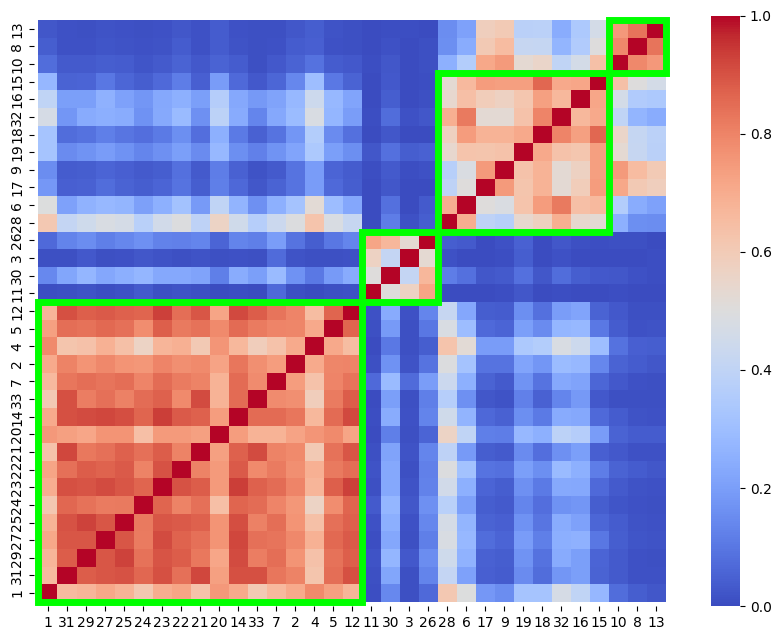

In [113]:
burnin = 1000
sim_mat, all_best_gibbs, all_sim_mats = vis_heatmap(cluster_ids)

In [43]:
# out = read_pickle('../pickle/sim_shift-8.p')
out = read_pickle('../pickle/sim.p')

In [44]:
out[0]

[array([0, 1, 1, 2, 2, 3, 3, 3, 3, 3, 4, 5, 5, 5, 5, 4, 4, 6, 6, 6, 7, 7,
        7, 7, 6], dtype=int64),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 4, 4, 4, 3, 3, 2, 2, 5, 5, 1, 1,
        1, 1, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 1,
        1, 1, 3], dtype=int64),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 3, 3, 4, 5, 5, 5, 5, 5, 1, 1,
        1, 1, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 5, 4, 2, 3, 6, 6, 4, 4, 4, 4, 4, 1, 1,
        1, 1, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1,
        1, 1, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 3, 3, 3, 4, 2, 2, 2, 2, 2, 1, 1,
        1, 1, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 1, 1, 1, 5, 5, 4, 3, 4, 4, 4, 2, 2, 2, 2, 2, 1, 1,
        1, 1, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 5, 5, 1, 5, 5, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1,
        1, 1, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 3, 3, 3,

In [45]:
cluster_ids, clster_params, n_clusters = reorder_cluster_ids(*out)

In [46]:
len(cluster_ids)

73

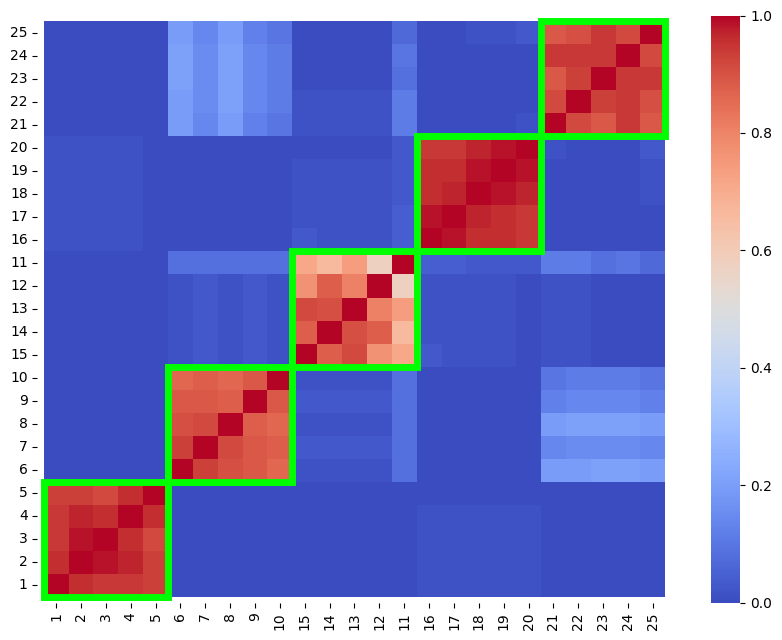

In [49]:
burnin = 1000
sim_mat, all_best_gibbs, all_sim_mats = vis_heatmap(cluster_ids[0:])